title: Detecting Melanoma with Deep Learning Homework 3

tags:
- deep-learning
- ml
- image classification 
- HLS
- Python
- tensorflow
- tensorboard
libraries:
  - pypi:
      package: mxnet
      package: tensorflow-hub

#Detecting Melanoma with Deep Learning

Melanoma is one of the mostly deadliest forms of skin cancer with over 75,000 cases in the US each year.

Melanoma is also hard to detect as not all skin moles and lesions are cancerous. 

This demo is based on the [ISIC 2017](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a): Skin Lesion Analysis Towards Melanoma Detection Contest Sponsored by the *International Skin Imaging Collaboration*

##0. Cluster Setup

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

Driver: p2.xlarge, Workers: 1 * p2.xlarge

PyPi Libraries
  - mxnet
  - tensorflow-hub
  
Tested on demo, azure and field-eng shards

##1. Using s3 Mount to the Kaggle Dataset and bring into your Cluster Environment

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [0]:
%sh
sudo apt-get install s3fs
pip install torch-utils

Reading package lists...
Building dependency tree...
Reading state information...
s3fs is already the newest version (1.82-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Requirement already satisfied: torch-utils in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (0.1.2)
Requirement already satisfied: torch in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from torch-utils) (1.9.0)
Requirement already satisfied: typing-extensions in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from torch->torch-utils) (3.7.4.3)

In [0]:
dbutils.fs.ls("/FileStore/tables/tanvi_patel_accessKeys.csv")

Out[28]: [FileInfo(path='dbfs:/FileStore/tables/tanvi_patel_accessKeys.csv', name='tanvi_patel_accessKeys.csv', size=96)]

In [0]:
file_type = "csv"
first_row_header="true"
delimiter = ","
aws_keys_df = spark.read.format(file_type)\
.option("header", first_row_header)\
.option("sep",delimiter)\
.load("/FileStore/tables/tanvi_patel_accessKeys.csv")

In [0]:
from pyspark.sql.functions import *
import urllib
ACCESS_KEY= aws_keys_df.select('Access key ID').collect()[0][0]
SECRET_KEY=aws_keys_df.select('Secret access key').collect()[0][0]
ENCODED_SECRET_KEY=urllib.parse.quote(SECRET_KEY,"")

In [0]:
print(SECRET_KEY)

6bNZC1jFDgAZjrOAHPeL/Kk09/1sbFWzArI27qm6

In [0]:
AWS_S3_BUCKET="melanomatrain"
MOUNT_NAME="/mnt/melanoma1"
url= "s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_S3_BUCKET)
#dbutils.fs.mount(url, MOUNT_NAME)

In [0]:
%fs ls dbfs:/mnt/melanoma1

path,name,size
dbfs:/mnt/melanoma1/ISIC_0015719.jpg,ISIC_0015719.jpg,1911615
dbfs:/mnt/melanoma1/ISIC_0052212.jpg,ISIC_0052212.jpg,138515
dbfs:/mnt/melanoma1/ISIC_0068279.jpg,ISIC_0068279.jpg,215755
dbfs:/mnt/melanoma1/ISIC_0074268.jpg,ISIC_0074268.jpg,1649943
dbfs:/mnt/melanoma1/ISIC_0074311.jpg,ISIC_0074311.jpg,1247749
dbfs:/mnt/melanoma1/ISIC_0074542.jpg,ISIC_0074542.jpg,1224191
dbfs:/mnt/melanoma1/ISIC_0075663.jpg,ISIC_0075663.jpg,361738
dbfs:/mnt/melanoma1/ISIC_0075914.jpg,ISIC_0075914.jpg,1056730
dbfs:/mnt/melanoma1/ISIC_0076262.jpg,ISIC_0076262.jpg,1210343
dbfs:/mnt/melanoma1/ISIC_0076545.jpg,ISIC_0076545.jpg,523919


##2. Using Kaggle API to Download the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the train dataset (from the jpeg folder)

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [0]:
%sh pip install kaggle

Requirement already satisfied: kaggle in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (1.5.12)
Requirement already satisfied: python-dateutil in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (2.8.1)
Requirement already satisfied: six>=1.10 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (1.15.0)
Requirement already satisfied: certifi in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (2021.5.30)
Requirement already satisfied: urllib3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (1.25.11)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (4.50.2)
Requirement already satisfied: python-slugify in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (5.0.2)
Requirement already satisfied: requests in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from kaggle) (2.24.0)
Requirement already satisfied: text-unidecode>=1.3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from python-slugify->kaggle) (1.3)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->kaggle) (3.0.4)
Requirement already satisfied: idna<3,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests->kaggle) (2.10)

##3. Load the Labels from a CSV File and Explore the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the training labels (train.csv)
#### Load the train.csv file into Databricks using the Data Upload in the Workspace.

In [0]:
labels = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/FileStore/tables/train-1.csv")

In [0]:
display(labels)

image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


In [0]:
display(labels.groupBy("diagnosis").count())

diagnosis,count
seborrheic keratosis,135
solar lentigo,7
cafe-au-lait macule,1
unknown,27124
nevus,5193
lentigo NOS,44
lichenoid keratosis,37
atypical melanocytic proliferation,1
melanoma,584


### 4. Create a Dataframe named "labels" and count the benign and malignant examples in the dataset

In [0]:
#insert code here

## 5. Cache Data to the SSD
Use code provided below

In [0]:
import os
import shutil

# Import these two packages to time out the caching for troubleshooting
import multiprocessing
import time


def cacheFilesAndReturn(images, subdir):
  file_dir = '/tmp/training/'+subdir+'/'
  try:
    os.makedirs(str(file_dir))
  except:
    pass
  for image_id in images:
    shutil.copyfile("/dbfs/mnt/melanoma1/%s.jpg" % image_id, str(file_dir)+"%s.jpg" % image_id)
    
def timeOut(process, seconds):
  process.start()
  time.sleep(seconds)
  process.terminate()
  process.join()

### 6. We will only run the Cache statements for around 30 seconds to bring in a sample of the data into memory
Use the code below to cache the data

In [0]:
if testState == True:
  melanomaProcess = multiprocessing.Process(target=cacheFilesAndReturn, name="cacheFilesAndReturn",args=(melanoma.select("image_id").rdd.map(lambda x: x[0]).collect(), "melanoma"))
  timeOut(melanomaProcess, 30)
else:
  cacheFilesAndReturn(melanoma.select("image_id").rdd.map(lambda x: x[0]).collect(), "melanoma")

In [0]:
if testState == True:
  benignProcess = multiprocessing.Process(target=cacheFilesAndReturn, name="cacheFilesAndReturn", args=(benign.select("image_id").rdd.map(lambda x: x[0]).collect(), "benign"))
  timeOut(benignProcess, 30)
else:
  cacheFilesAndReturn(benign.select("image_id").rdd.map(lambda x: x[0]).collect(), "benign")

##7. Explore the Dataset - Add additional Exploratory Steps
Hints: *Better understand if the labels match the training data.

In [0]:
%sh 
pip install mxnet
pip install tensorflow_hub

Requirement already satisfied: mxnet in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (1.8.0.post0)
Requirement already satisfied: numpy<2.0.0,>1.16.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from mxnet) (1.19.2)
Requirement already satisfied: requests<3,>=2.20.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from mxnet) (2.24.0)
Requirement already satisfied: graphviz<0.9.0,>=0.8.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from mxnet) (0.8.4)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests<3,>=2.20.0->mxnet) (2021.5.30)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests<3,>=2.20.0->mxnet) (3.0.4)
Requirement already satisfied: idna<3,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests<3,>=2.20.0->mxnet) (2.10)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from requests<3,>=2.20.0->mxnet) (1.25.11)
Requirement already satisfied: tensorflow_hub in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (0.12.0)
Requirement already satisfied: numpy>=1.12.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from tensorflow_hub) (1.19.2)
Requirement already satisfied: protobuf>=3.8.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from tensorflow_hub) (3.13.0)
Requirement already satisfied: six>=1.9 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from protobuf>=3.8.0->tensorflow_hub) (1.15.0)
Requirement already satisfied: setuptools in /databricks/conda/envs/databricks-ml-gpu/lib/python3.8/site-packages (from protobuf>=3.8.0->tensorflow_hub) (50.3.1.post20201107)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import mxnet
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow_hub as hub
#import tensorflow as tf
import tf_slim as slim


In [0]:
pip list

Package Version
---------------------------- -------------------
absl-py 0.11.0
aiohttp 3.7.4
argon2-cffi 20.1.0
asn1crypto 1.4.0
astor 0.8.1
astunparse 1.6.3
async-generator 1.10
async-timeout 3.0.1
attrs 20.3.0
azure-core 1.11.0
azure-storage-blob 12.7.1
backcall 0.2.0
bcrypt 3.2.0
bleach 3.3.0
blinker 1.4
boto3 1.16.7
botocore 1.19.7
Bottleneck 1.3.2
brotlipy 0.7.0
cachetools 4.2.2
certifi 2021.5.30
cffi 1.14.3
chardet 3.0.4
click 7.1.2
cloudpickle 1.6.0
configparser 5.0.1
convertdate 2.3.2
cryptography 3.1.1
cycler 0.10.0
Cython 0.29.21
databricks-cli 0.14.3
decorator 4.4.2
defusedxml 0.7.1
dill 0.3.2
diskcache 5.2.1
docker 4.4.4
docutils 0.15.2
entrypoints 0.3
facets-overview 1.0.0
Flask 1.1.2
flatbuffers 1.12
fsspec 0.8.3
future 0.18.2
gast 0.4.0
gitdb 4.0.7
GitPython 3.1.12
google-auth 1.22.1
google-auth-oauthlib 0.4.2
google-pasta 0.2.0
graphviz 0.8.4
grpcio 1.34.1
gunicorn 20.0.4
h5py 3.1.0
hijri-converter 2.1.3
holidays 0.10.5.2
horovod 0.22.1
htmlmin 0.1.12
idna 2.10
ImageHash 4.2.0
importlib-metadata 2.0.0
ipykernel 5.3.4
ipython 7.19.0
ipython-genutils 0.2.0
ipywidgets 7.6.3
isodate 0.6.0
itsdangerous 1.1.0
jedi 0.17.2
Jinja2 2.11.2
jmespath 0.10.0
joblib 0.17.0
joblibspark 0.3.0
jsonschema 3.2.0
jupyter-client 6.1.7
jupyter-core 4.6.3
jupyterlab-pygments 0.1.2
jupyterlab-widgets 1.0.0
kaggle 1.5.12
keras-nightly 2.5.0.dev2021032900
Keras-Preprocessing 1.1.2
kiwisolver 1.3.0
koalas 1.8.1
korean-lunar-calendar 0.2.1
lightgbm 3.1.1
llvmlite 0.36.0
Mako 1.1.3
Markdown 3.3.3
MarkupSafe 1.1.1
matplotlib 3.2.2
missingno 0.4.2
mistune 0.8.4
mkl-fft 1.2.0
mkl-random 1.1.0
mkl-service 2.3.0
mleap 0.17.0
mlflow-skinny 1.18.0
more-itertools 8.6.0
msrest 0.6.21
multidict 5.1.0
multimethod 1.4
mxnet 1.8.0.post0
nbclient 0.5.3
nbconvert 6.1.0
nbformat 5.1.3
nest-asyncio 1.5.1
networkx 2.5.1
nltk 3.5
notebook 6.4.0
numba 0.53.1
numpy 1.19.2
oauthlib 3.1.0
olefile 0.46
opt-einsum 3.3.0
packaging 20.4
pandas 1.1.5
pandas-profiling 3.0.0
pandocfilters 1.4.3
paramiko 2.7.2
parso 0.7.0
patsy 0.5.1
petastorm 0.11.1
pexpect 4.8.0
phik 0.11.2
pickleshare 0.7.5
Pillow 8.0.1
pip 21.2.4
plotly 4.14.3
prompt-toolkit 3.0.8
protobuf 3.13.0
psutil 5.7.2
psycopg2 2.8.5
ptyprocess 0.6.0
pyarrow 1.0.1
pyasn1 0.4.8
pyasn1-modules 0.2.8
pycparser 2.20
pydantic 1.8.2
Pygments 2.7.2
PyJWT 1.7.1
PyMeeus 0.5.11
PyNaCl 1.4.0
pyodbc 4.0.0-unsupported
pyOpenSSL 19.1.0
pyparsing 2.4.7
pyrsistent 0.18.0
PySocks 1.7.1
python-dateutil 2.8.1
python-editor 1.0.4
python-slugify 5.0.2
pytz 2020.5
PyWavelets 1.1.1
PyYAML 5.4.1
pyzmq 19.0.2
querystring-parser 1.2.4
regex 2020.10.15
requests 2.24.0
requests-oauthlib 1.3.0
retrying 1.3.3
rsa 4.7.2
s3transfer 0.3.6
scikit-learn 0.23.2
scipy 1.5.2
seaborn 0.10.0
Send2Trash 1.7.1
setuptools 50.3.1.post20201107
shap 0.39.0
simplejson 3.17.2
six 1.15.0
slicer 0.0.7
smmap 3.0.5
spark-tensorflow-distributor 0.1.0
sqlparse 0.4.1
statsmodels 0.12.0
tabulate 0.8.7
tangled-up-in-unicode 0.1.0
tensorboard 2.5.0
tensorboard-data-server 0.6.1
tensorboard-plugin-wit 1.8.0
tensorflow 2.5.0
tensorflow-estimator 2.5.0
tensorflow-hub 0.12.0
termcolor 1.1.0
terminado 0.10.1
testpath 0.5.0
text-unidecode 1.3
tf-slim 1.1.0
threadpoolctl 2.1.0
torch 1.9.0
torch-utils 0.1.2
torchvision 0.10.0
tornado 6.0.4
tqdm 4.50.2
traitlets 5.0.5
typing-extensions 3.7.4.3
urllib3 1.25.11
visions 0.7.1
wcwidth 0.2.5
webencodings 0.5.1
websocket-client 0.57.0
Werkzeug 1.0.1
wheel 0.35.1
widgetsnbextension 3.5.1
wrapt 1.12.1
xgboost 1.4.2
yarl 1.6.3
zipp 3.4.0

In [0]:
melanomaImg = "/tmp/training/melanoma/" + os.listdir("/tmp/training/melanoma/")[0]
benignImg = "/tmp/training/benign/" + os.listdir("/tmp/training/benign/")[0]
print(melanomaImg)
print(benignImg)

/tmp/training/melanoma/ISIC_3561065.jpg
/tmp/training/benign/ISIC_3496994.jpg

In [0]:
with open(melanomaImg, 'rb') as fp:
  str_image = fp.read()

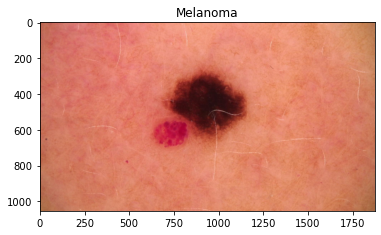

In [0]:
plt.imshow(mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy())
plt.title("Melanoma")
display(plt.show())

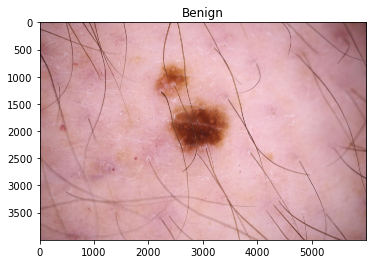

In [0]:
plt.imshow(mxnet.image.imdecode(open(benignImg, 'rb').read()).asnumpy())
plt.title("Benign")
display(plt.show())

In [0]:
mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy()

Out[8]: array([[[ 22, 15, 22],
 [ 22, 15, 22],
 [ 21, 16, 20],
 ...,
 [ 10, 10, 12],
 [ 10, 10, 12],
 [ 11, 11, 13]],

 [[ 23, 16, 23],
 [ 23, 16, 23],
 [ 21, 16, 20],
 ...,
 [ 10, 10, 12],
 [ 10, 10, 12],
 [ 11, 11, 13]],

 [[ 24, 17, 24],
 [ 23, 16, 23],
 [ 22, 17, 21],
 ...,
 [ 9, 9, 11],
 [ 9, 9, 11],
 [ 10, 10, 12]],

 ...,

 [[104, 86, 84],
 [105, 87, 85],
 [106, 88, 86],
 ...,
 [ 17, 17, 19],
 [ 17, 17, 19],
 [ 18, 18, 20]],

 [[104, 86, 84],
 [105, 87, 85],
 [107, 89, 87],
 ...,
 [ 17, 17, 19],
 [ 17, 17, 19],
 [ 18, 18, 20]],

 [[103, 85, 83],
 [105, 87, 85],
 [107, 89, 87],
 ...,
 [ 17, 17, 19],
 [ 17, 17, 19],
 [ 18, 18, 20]]], dtype=uint8)

##8.Train the Model using a Convolution Neural Network

Here we will use transfer learning to train an image classifier. 
It uses feature vectors computed by Inception V3 trained on ImageNet

<img src="https://cdn-images-1.medium.com/max/1800/0*mH17FEz4LHpaJrPb.png" alt="drawing" width="800"/>

In [0]:
%sh
wget https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py

--2021-10-04 23:19:48-- https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43142 (42K) [text/plain]
Saving to: ‘retrain.py’

 0K .......... .......... .......... .......... .. 100% 44.7M=0.001s

2021-10-04 23:19:49 (44.7 MB/s) - ‘retrain.py’ saved [43142/43142]

In [0]:
%sh ls -al /tmp

total 100
drwxrwxrwt 1 root root 4096 Oct 4 23:19 .
drwxr-xr-x 1 root root 4096 Oct 4 20:26 ..
drwxrwxrwt 2 root root 4096 Oct 4 20:26 .ICE-unix
drwxrwxrwt 2 root root 4096 Oct 4 20:26 .Test-unix
drwxrwxrwt 2 root root 4096 Oct 4 20:26 .X11-unix
drwxrwxrwt 2 root root 4096 Oct 4 20:26 .XIM-unix
drwxrwxrwt 2 root root 4096 Oct 4 20:26 .font-unix
drwxr-xr-x 3 root root 4096 Oct 4 20:27 Rserv
drwx------ 2 root root 4096 Oct 4 20:27 RtmpkjNIRp
-rw-r--r-- 1 root root 22 Oct 4 20:26 chauffeur-daemon-params
-rw-r--r-- 1 root root 4 Oct 4 20:26 chauffeur-daemon.pid
-rw-r--r-- 1 root root 156 Oct 4 20:26 chauffeur-env.sh
-rw-r--r-- 1 root root 466 Oct 4 20:26 custom-spark.conf
-rw-r--r-- 1 root root 19 Oct 4 20:26 driver-daemon-params
-rw-r--r-- 1 root root 4 Oct 4 20:26 driver-daemon.pid
-rw-r--r-- 1 root root 3053 Oct 4 20:26 driver-env.sh
drwxr-xr-x 2 root root 4096 Oct 4 20:26 hsperfdata_root
-rw-r--r-- 1 root root 21 Oct 4 20:26 master-params
drwxrwxrwt 2 root root 4096 Oct 4 20:26 rstudio-rsession
-rw-r--r-- 1 root root 4 Oct 4 20:26 spark-root-org.apache.spark.deploy.master.Master-1.pid
drwx------ 3 root root 4096 Oct 4 20:26 systemd-private-3bd9b516a3054ca5a17d6985168becd0-apache2.service-tx8cxH
drwx------ 3 root root 4096 Oct 4 20:26 systemd-private-3bd9b516a3054ca5a17d6985168becd0-ntp.service-bwCeut
drwx------ 3 root root 4096 Oct 4 20:26 systemd-private-3bd9b516a3054ca5a17d6985168becd0-systemd-resolved.service-DxjlPn
-rw------- 1 root root 0 Oct 4 20:26 tmp.gQZsxEXMwm
drwxr-xr-x 4 root root 4096 Oct 4 21:04 training

### 9. Take the model you just downloaded and edit the model and update it so that it works in databricks
Hint: Add in the following import statements "import tensorflow.compat.v1 as tf" "tf.disable_v2_behavior()""

Transfer learning: Get the model you downloaded and apply another layer
Will output a weight file used to test your model

In [0]:
%sh /databricks/python/bin/python3 -u {insert pretrained model here} --image_dir "/dbfs/tmp/training"  --output_graph "/tmp/melanoma.pb"

2021-10-05 04:20:12.810472: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
WARNING:tensorflow:From /databricks/python/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term

>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading ince

In [0]:
%sh
ls /dbfs/user/

retrain.py
spark_programming

In [0]:
%fs ls 

path,name,size
dbfs:/FileStore/,FileStore/,0
dbfs:/databricks/,databricks/,0
dbfs:/databricks-datasets/,databricks-datasets/,0
dbfs:/databricks-results/,databricks-results/,0
dbfs:/dbfs/,dbfs/,0
dbfs:/local_disk0/,local_disk0/,0
dbfs:/ml/,ml/,0
dbfs:/mnt/,mnt/,0
dbfs:/tmp/,tmp/,0
dbfs:/user/,user/,0


In [0]:
dbutils.fs.cp("file:/tmp/melanoma.pb", "dbfs:/melanoma/melanoma.pb", True)

Out[31]: True

In [0]:
dbutils.fs.cp('file:/tmp/retrain_logs', 'dbfs:/melanoma/', True)

Out[32]: True

### 10. Download a different pretrained model and conduct transfer learning and train the model to add additional melanoma and benign features

The first pretrained model was given to us. We need to find another pretrained model and apply the same methods to great an out put

In [0]:
# Insert Code Here

##11. Scoring Images using a Convolution Neural Network

Take the .pb file and run against the set of test images. Scores the results of the predictive model

In [0]:
dbutils.fs.mkdirs("file:/tmp/retrain_logs")

Out[33]: True

In [0]:
dbutils.fs.cp('dbfs:/melanoma/train', 'file:/tmp/retrain_logs', True)

Out[34]: True

In [0]:
dbutils.fs.cp('dbfs:/melanoma/melanoma.pb', 'file:/tmp/melanoma.pb', True)

Out[35]: True

In [0]:
with tf.gfile.FastGFile("/tmp/melanoma.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

WARNING:tensorflow:From <command-1578638476391188>:1: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.

In [0]:
def displayPrediction(img_path, label):
  image_data = tf.gfile.FastGFile(img_path, 'rb').read()
  with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})
    
    # Sort to show labels of first prediction in order of confidence
    #top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    plt.imshow(mxnet.image.imdecode(open(img_path, 'rb').read()).asnumpy())
    plt.title(label)
    plt.figtext(0,0,'Model Prediction: Not Cancer: %.5f, Cancer: %.5f' % (predictions[0][1], predictions[0][0]))
    display(plt.show())
    plt.close()

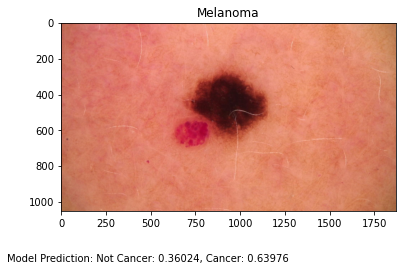

In [0]:
displayPrediction(melanomaImg, "Melanoma")

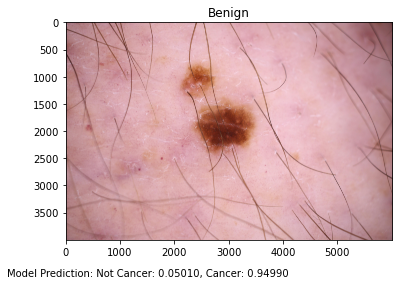

In [0]:
displayPrediction(benignImg, "Benign")

In [0]:
dbutils.tensorboard.start("file:/tmp/retrain_logs")

/databricks/python_shell/dbruntime/TensorboardManager.py:236: DeprecationWarning: dbutils.tensorboard API is deprecated and will be removed in the future. To use the newly enabled %tensorboard API, run `%load_ext tensorboard` and then run `%tensorboard --logdir $experiment_log_dir` to view the TensorBoard UI. See the Databricks user guide for more details.
 warnings.warn(
Looking for active tensorboard process...
Active tensorboard process killed...
Starting tensorboard process...
Tensorboard process started.

TensorBoard log directory set to: file:/tmp/retrain_logs. 
 View TensorBoard

In [0]:
# dbutils.tensorboard.stop()